In [1]:
import sys
sys.path.append('..')

import numpy as np 
import pandas as pd 
from scipy.optimize import root

from mod.SimSale import SimSale
from mod.Demand import Demand
from numba import jit

# from numdifftools import Hessian,Jacobian

## 1.模拟数据 及 待估计参数

In [2]:
sim_sale=SimSale(level_size=[3,3],seed=10)
sale_df = sim_sale.generate_sale(lam=1000,size=200,un_ava_frac=0.25,un_ava_mix=True)
# sale_df
print(sim_sale.attr_f_list[0])
print(sim_sale.attr_f_list[1])
print(sim_sale.attr_pi_list[0])
print(sim_sale.attr_pi_list[1]) 
mod = Demand(data=sale_df, 
             goods_attr={'A': list('abc'), 'B': list('abc')})
sale_df.reset_index(drop=True)

a    0.479890
b    0.104251
c    0.415859
Name: A, dtype: float64
a    0.267030
b    0.349371
c    0.383599
Name: B, dtype: float64
          a         b         c
a  1.000000  0.461524  0.122328
b  0.620133  1.000000  0.382958
c  0.861233  0.742800  1.000000
          a         b         c
a  1.000000  0.130495  0.671022
b  0.125416  1.000000  0.203503
c  0.767916  0.275686  1.000000


,A_a*B_a,A_a*B_b,A_a*B_c,A_b*B_a,A_b*B_b,A_b*B_c,A_c*B_a,A_c*B_b,A_c*B_c
0,NaN,165.0,270.0,NaN,38.0,63.0,114.0,139.0,159.0
1,NaN,165.0,272.0,NaN,34.0,54.0,126.0,146.0,144.0
2,NaN,194.0,277.0,27.0,NaN,40.0,99.0,151.0,155.0
3,242.0,201.0,NaN,28.0,NaN,41.0,112.0,151.0,168.0
4,NaN,151.0,278.0,NaN,38.0,57.0,124.0,127.0,133.0
...,...,...,...,...,...,...,...,...,...
195,227.0,290.0,206.0,19.0,36.0,38.0,NaN,NaN,167.0
196,113.0,NaN,198.0,30.0,228.0,30.0,124.0,NaN,159.0
197,130.0,168.0,319.0,NaN,28.0,45.0,98.0,132.0,NaN
198,122.0,NaN,222.0,25.0,NaN,38.0,124.0,178.0,151.0


## 2.参数估计

     fun: 331047.1417850984
 message: ['Maximum number of iteration reached']
    nfev: 46185
    nhev: 0
     nit: 1000
    njev: 536
  status: 0
 success: True
       x: array([ 0.62931827, -0.8970027 ,  0.47399691, -0.50738106, -0.24515795,
       -0.14396152, -0.1883743 , -2.28162248,  0.26477965,  0.26507642,
        1.59523528,  1.003981  , -1.70081467,  0.61501236, -1.13192907,
       -2.28424462,  1.13985904, -1.02007437])
([array([0.48228244, 0.10481626, 0.41290129]), array([0.26751876, 0.3477253 , 0.38475594])], [array([0.45304519, 0.09265646, 0.56581087, 0.56588378, 0.8313514 ,
       0.73184057]), array([0.15435889, 0.64908334, 0.24380527, 0.09243625, 0.75765376,
       0.26501291])])


0.978379094001808

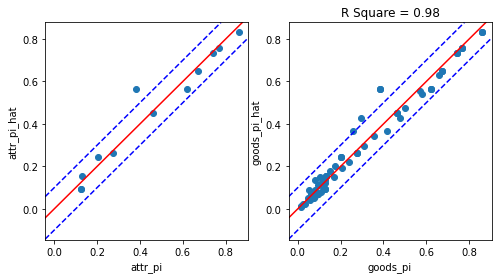

In [3]:
# method='dual_annealing'
mod.fit(method='dual_annealing',maxiter=1000)
print(mod.theta_hat)
print(mod.init_theta(mod.theta_hat.x,to_goods=False))

mod.score(SimSale=sim_sale,plot=True)

In [4]:
mod.attr_trans

[       A_a    A_b    A_c
 A_a    NaN  112.0  112.0
 A_b  126.0    NaN  126.0
 A_c  119.0  119.0    NaN,
        B_a    B_b    B_c
 B_a    NaN  115.0  115.0
 B_b  110.0    NaN  110.0
 B_c  117.0  117.0    NaN]

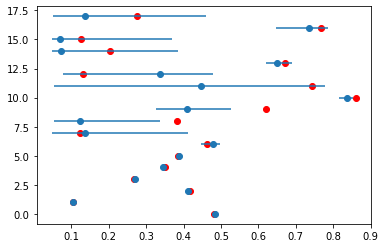

In [28]:
a,b,c=mod.conf_int(SimSale=sim_sale,bootstrap_n=20)

In [ ]:
level = 0.95
theta_matrix = np.column_stack(c)

int_up       = np.quantile(theta_matrix,q=level+(1-level)/2,axis=1)
int_up       = mod.init_theta(int_up,to_goods=False)
int_up       = np.append(np.concatenate(int_up[0]),np.concatenate(int_up[1]))

int_dw       = np.quantile(theta_matrix,q=(1-level)/2,axis=1)
int_dw       = mod.init_theta(int_dw,to_goods=False)
int_dw       = np.append(np.concatenate(int_dw[0]),np.concatenate(int_dw[1]))

int_md       = np.quantile(theta_matrix,q=0.5,axis=1)
int_md       = mod.init_theta(int_md,to_goods=False)
int_md       = np.append(np.concatenate(int_md[0]),np.concatenate(int_md[1]))

In [ ]:
int_dw

In [ ]:
c